# Logistic Regression

Logistic regression is used for classification instead of predicting a continous output.

In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Custom implementation

1. **Model definition**: Logistic regression estimates the probability that a given input point belongs to a certain class. The output of logistic regression is a probability that the given input point belongs to a certain class. The probability prediction is done using the logistic function, also called the sigmoid function. The sigmoid function maps any real-valued number into a range between 0 and 1.

2. **Cost function and gradient descent**: Logistic regression uses a method called gradient descent to find the optimal parameters (weights and bias) for the model. It does this by iteratively adjusting the parameters to minimize the cost function, which measures the difference between the model's predictions and the actual data.

3. **The Sigmoid function**: The _sigmoid function is the heart of logistic regression. Given an input z, it returns a value between 0 and 1. This value can be interpreted as the probability of the input belonging to the positive class.

4. **Initialization**: The fit function starts by getting the number of samples and features from the input data X. It then initializes the weights to zero (using `np.zeros(num_features)`) and the bias to zero as well.

5. **Gradient Descent**: The next part of the fit function is a loop that runs for a number of iterations specified when the model was created. For each iteration, it calculates the predicted outputs (using `np.dot(X, self.weights) + self.bias` and the sigmoid function), computes the gradient of the cost function with respect to the weights (dw) and bias (db), and updates the weights and bias by taking a step in the direction opposite to the gradient (this is why there is a minus sign in `self.weights -= self.learning_rate * dw` and `self.bias -= self.learning_rate * db`).

6. **Prediction**: After the model has been trained using the fit method, you can use the predict method to predict the class of new data points. This method calculates y_predicted which is a probability, and then it converts these probabilities into class labels, returning 1 if the probability is greater than 0.5 and 0 otherwise.

In [9]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=5000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.num_iterations):
            # compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [10]:
clr = CustomLogisticRegression()
clr.fit(X_train, y_train)

y_pred = clr.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  1.0
F1 score:  1.0


## Scikit-learn

In [11]:
# Fit logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Output Accuracy and F1 score
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  1.0
F1 score:  1.0


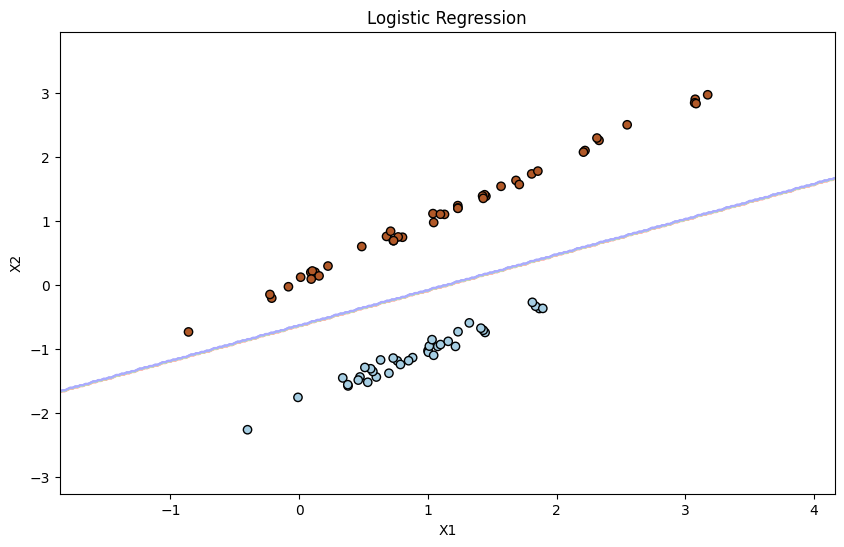

In [12]:
# Plot the data and the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.title('Logistic Regression')
plt.show()